In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x=data.iloc[:, [3,4]].values

Text(0.5, 0, 'No. of clusters')

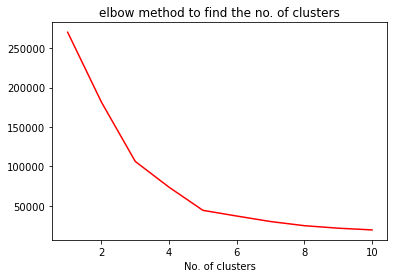

In [4]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters= i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,color='red')    
plt.title('elbow method to find the no. of clusters')
plt.xlabel('No. of clusters')

In [5]:
kmeans=KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,random_state=0)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=0)

In [6]:
y_kmeans=kmeans.predict(x)
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

Text(0.5, 1.0, 'Clustering')

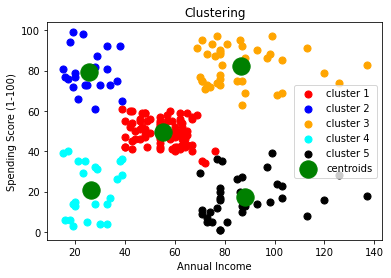

In [7]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],color='red',s=50,label='cluster 1 ')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],color='blue',s=50,label='cluster 2 ')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],color='orange',s=50,label='cluster 3 ')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],color='cyan',s=50,label='cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],color='black',s=50,label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],label='centroids',s=300,color='green')
plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering')

In [8]:
#Exploratory data analysis

In [9]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='Genre', ylabel='count'>

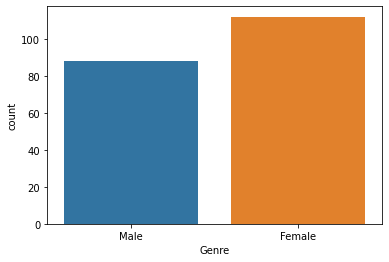

In [10]:
sns.countplot(x='Genre',data=data)

In [11]:
p=data['Genre'].value_counts()
p

Female    112
Male       88
Name: Genre, dtype: int64

([<matplotlib.patches.Wedge at 0x21083edd130>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.0%'),
  Text(0.11242879316591654, -0.5893723495951058, '44.0%')])

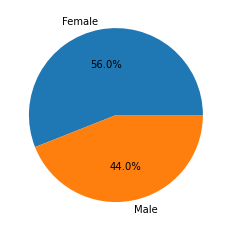

In [12]:
plt.pie(p,labels=np.unique(data['Genre']),autopct='%1.1f%%')

C:\Users\yashm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

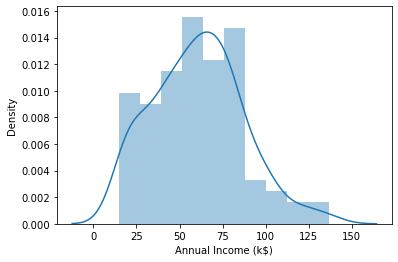

In [13]:
sns.distplot(data['Annual Income (k$)'])

C:\Users\yashm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

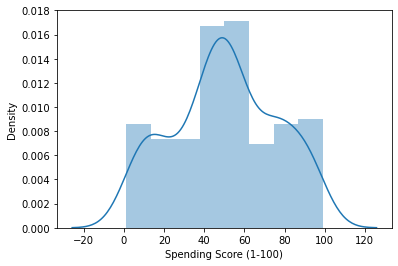

In [14]:
sns.distplot(data['Spending Score (1-100)'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

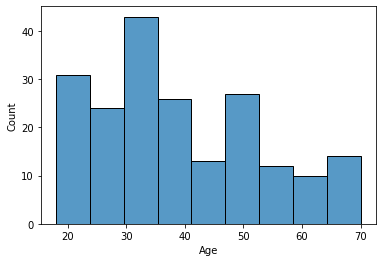

In [15]:
sns.histplot(data['Age'])

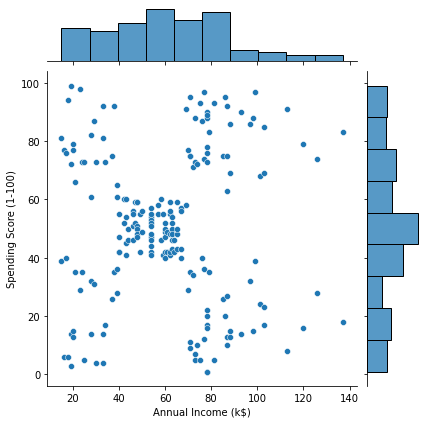

In [16]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data)

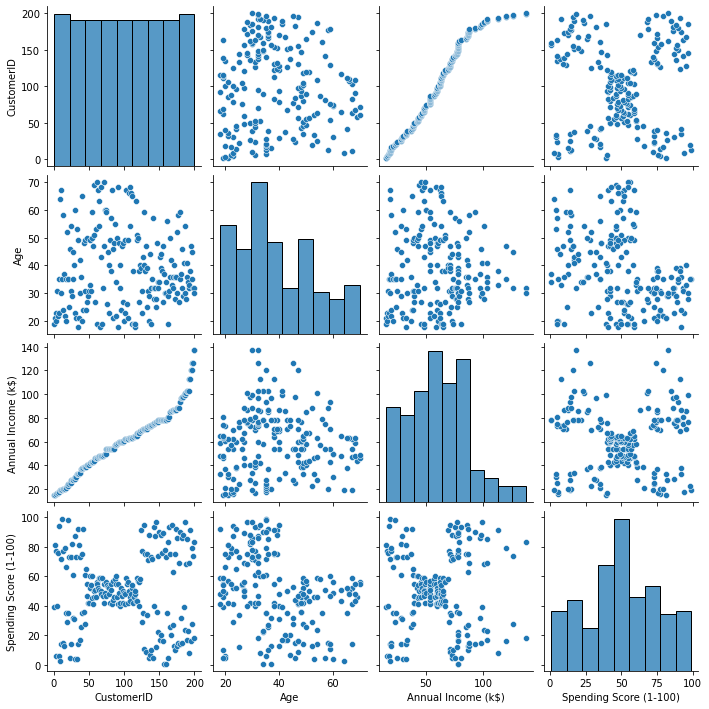

In [17]:
sns.pairplot(data)

<AxesSubplot:xlabel='Genre', ylabel='Spending Score (1-100)'>

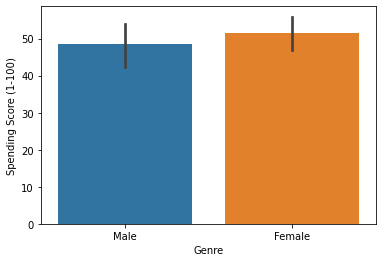

In [18]:
sns.barplot(x='Genre',y='Spending Score (1-100)',data=data)

<AxesSubplot:xlabel='Genre', ylabel='Annual Income (k$)'>

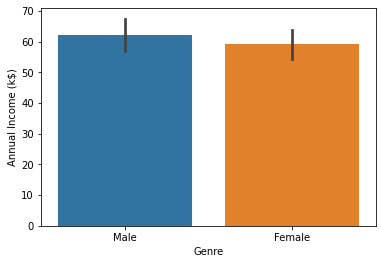

In [19]:
sns.barplot(x='Genre',y='Annual Income (k$)',data=data)